# MNIST

AIで数字を認識しましょう！

In [1]:
import numpy as np    
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

## データセット

MNISTは有名なデータセットであり、kerasから簡単にアクセスできるようになっている！

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

中身を確認すると…

In [3]:
# shape
print(x_train.shape)

(60000, 28, 28)


Label: 5


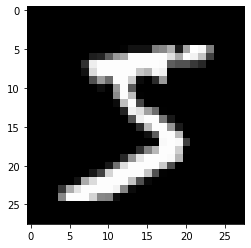

Label: 0


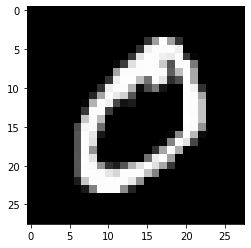

Label: 4


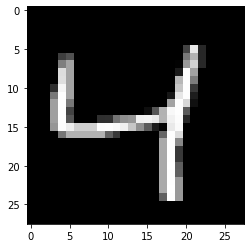

Label: 1


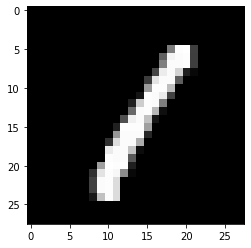

Label: 9


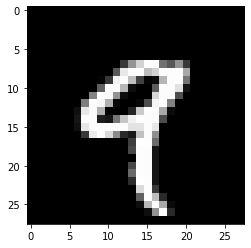

Label: 2


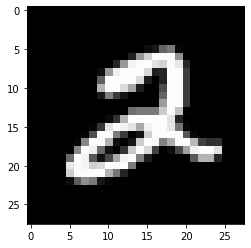

Label: 1


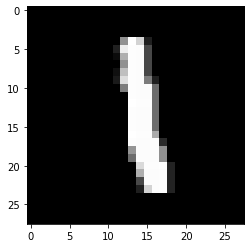

Label: 3


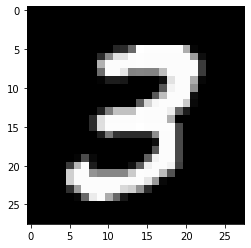

Label: 1


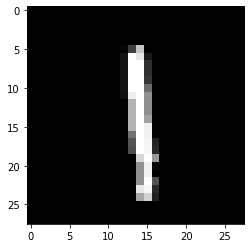

Label: 4


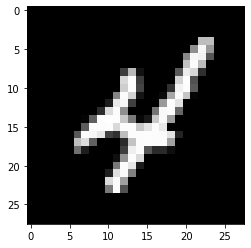

In [4]:
# 最初の10個を表示
for i in range(10):
    print("Label:", y_train[i])
    plt.imshow(x_train[i], cmap="gray")
    plt.show()

## データの準備

- 2次元の画像を1次元に変換
- 正規化（0~255 → 0~1）
- 「0~9」のラベルをOne-Hotに変換

In [5]:
from keras.utils import to_categorical

def prepare_dataset(x, y):
    
    # 2次元の配列を1次元にする
    x = np.reshape(x, (x.shape[0], 784))
    
    # 正規化
    x = x / 255
    
    # One-Hot エンコーディング
    y = to_categorical(y)
    
    return x, y

# 学習と検証データを用意
x_train_p, y_train_p = prepare_dataset(x_train, y_train)
x_test_p, y_test_p = prepare_dataset(x_test, y_test)

In [6]:
print(x_train_p.shape)

(60000, 784)


In [7]:
print(y_train_p[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## モデルを構築

とりあえず、果物のモデルをベースにしよう。ただし：

- 入力は２個ではなくて、784個
- 出力は４個ではなくて、10個（0～9）

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    x = Input(shape=(784,), dtype=float)
    h = Dense(16, activation="relu")(x)
    y = Dense(10, activation="softmax")(h) 
    
    model = Model(inputs=x, outputs=y)

    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [10]:
model.fit(x_train_p, y_train_p, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 1s 743us/step - loss: 0.4315 - accuracy: 0.8806
Epoch 2/25
1875/1875 [==============================] - 1s 777us/step - loss: 0.2548 - accuracy: 0.9281
Epoch 3/25
1875/1875 [==============================] - 2s 932us/step - loss: 0.2254 - accuracy: 0.9357
Epoch 4/25
1875/1875 [==============================] - 2s 801us/step - loss: 0.2081 - accuracy: 0.9409
Epoch 5/25
1875/1875 [==============================] - 1s 774us/step - loss: 0.1932 - accuracy: 0.9445
Epoch 6/25
1875/1875 [==============================] - 2s 878us/step - loss: 0.1828 - accuracy: 0.9471
Epoch 7/25
1875/1875 [==============================] - 2s 964us/step - loss: 0.1722 - accuracy: 0.9499
Epoch 8/25
1875/1875 [==============================] - 2s 952us/step - loss: 0.1641 - accuracy: 0.9522
Epoch 9/25
1875/1875 [==============================] - 2s 915us/step - loss: 0.1565 - accuracy: 0.9540
Epoch 10/25
1875/1875 [==============================] - 2s 890u

## 結果確認

In [11]:
# 結果を表示する
def display_result(x_test, y_test, y_pred):

    # AIの出力（信頼）
    max_idx = np.argmax(y_pred)
    confidence = y_pred[max_idx] * 100
    print('認識: %d (%.2f%%) - 正しい：%d'%(max_idx, confidence, y_test))
    
    # 入力画像
    plt.imshow(x_test, cmap="gray")
    plt.show()

認識: 7 (99.99%) - 正しい：7


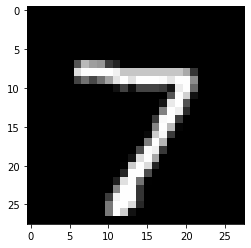

認識: 2 (100.00%) - 正しい：2


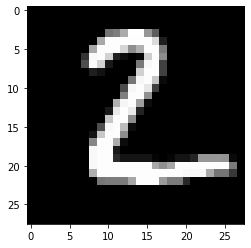

認識: 1 (99.83%) - 正しい：1


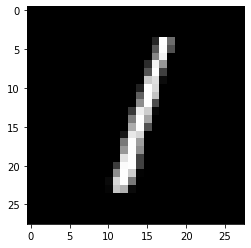

認識: 0 (99.98%) - 正しい：0


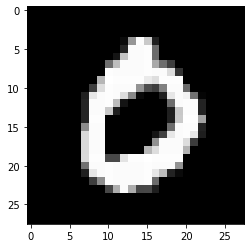

認識: 4 (96.06%) - 正しい：4


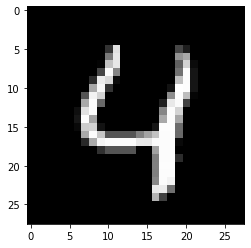

認識: 1 (99.98%) - 正しい：1


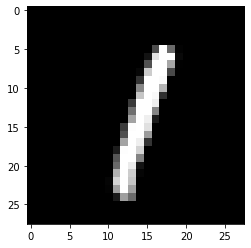

認識: 4 (98.89%) - 正しい：4


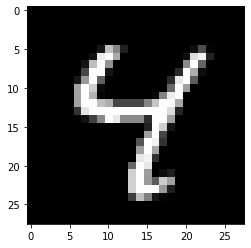

認識: 9 (99.89%) - 正しい：9


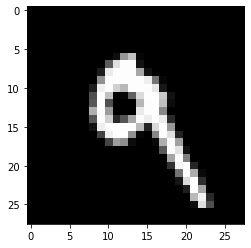

認識: 6 (99.84%) - 正しい：5


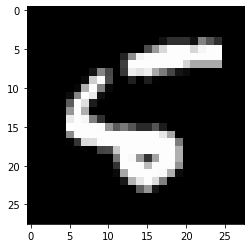

認識: 9 (99.87%) - 正しい：9


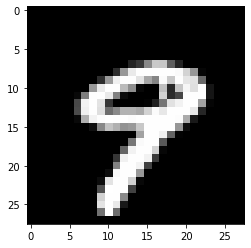

認識: 0 (99.54%) - 正しい：0


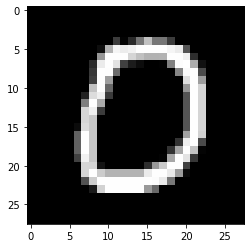

認識: 6 (99.59%) - 正しい：6


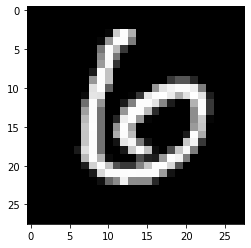

認識: 9 (99.95%) - 正しい：9


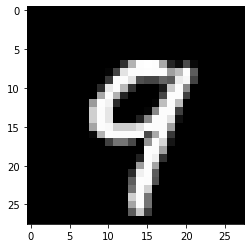

認識: 0 (99.54%) - 正しい：0


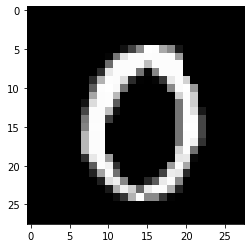

認識: 1 (99.98%) - 正しい：1


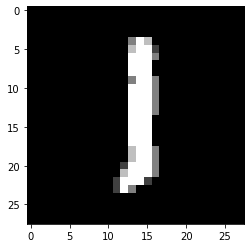

認識: 5 (97.31%) - 正しい：5


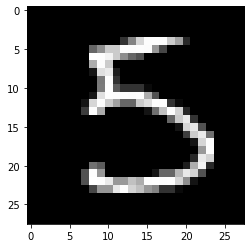

認識: 9 (99.46%) - 正しい：9


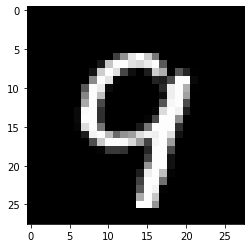

認識: 7 (99.57%) - 正しい：7


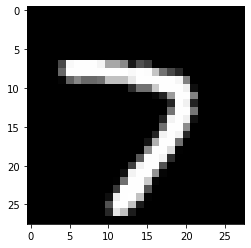

認識: 8 (57.42%) - 正しい：3


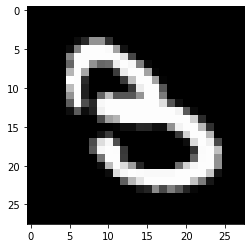

認識: 4 (99.93%) - 正しい：4


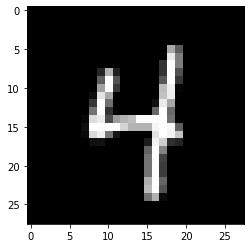

認識: 9 (98.00%) - 正しい：9


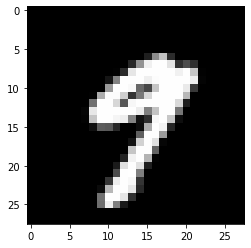

認識: 6 (99.81%) - 正しい：6


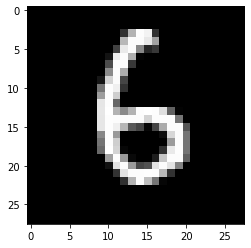

認識: 6 (99.99%) - 正しい：6


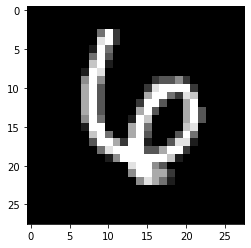

認識: 5 (100.00%) - 正しい：5


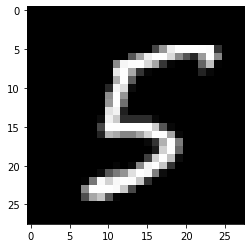

認識: 4 (98.58%) - 正しい：4


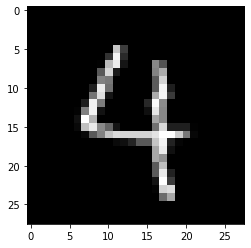

認識: 0 (99.99%) - 正しい：0


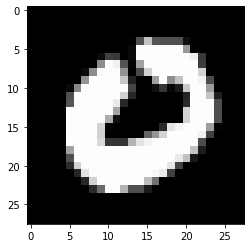

認識: 7 (99.97%) - 正しい：7


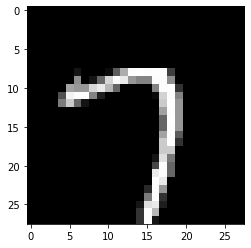

認識: 4 (99.95%) - 正しい：4


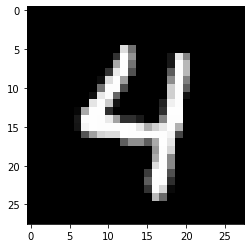

認識: 0 (99.65%) - 正しい：0


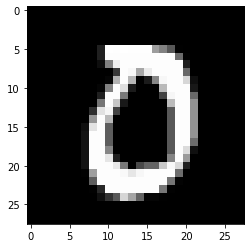

認識: 1 (99.40%) - 正しい：1


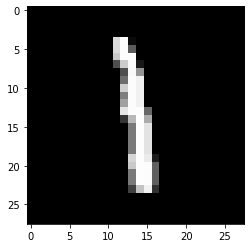

認識: 3 (100.00%) - 正しい：3


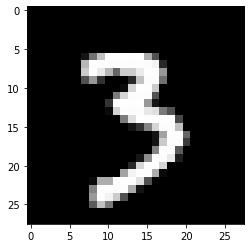

認識: 1 (99.83%) - 正しい：1


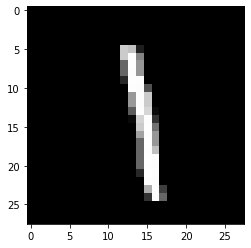

認識: 3 (99.86%) - 正しい：3


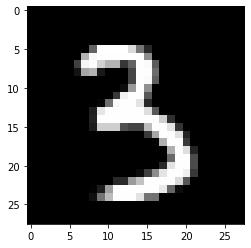

認識: 4 (95.86%) - 正しい：4


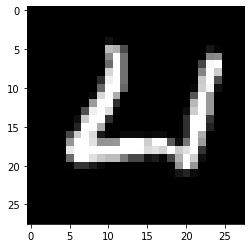

認識: 7 (99.94%) - 正しい：7


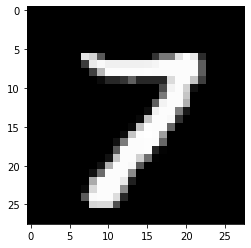

認識: 2 (99.97%) - 正しい：2


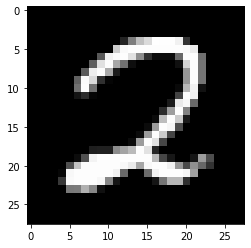

認識: 7 (99.93%) - 正しい：7


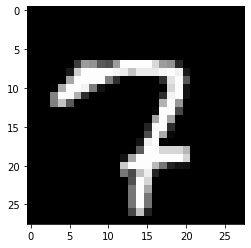

認識: 1 (99.98%) - 正しい：1


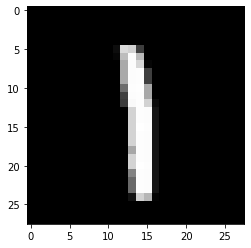

認識: 2 (63.41%) - 正しい：2


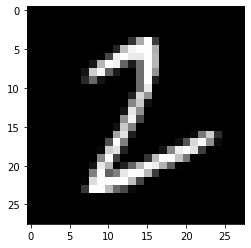

認識: 1 (99.95%) - 正しい：1


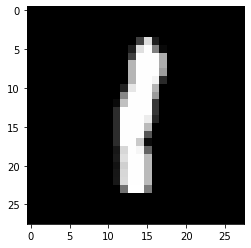

認識: 1 (99.18%) - 正しい：1


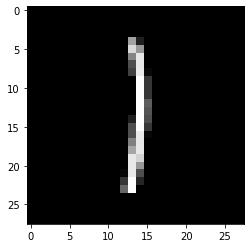

認識: 7 (99.80%) - 正しい：7


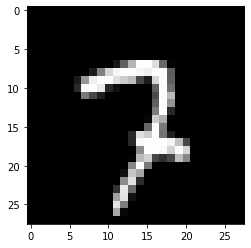

認識: 4 (98.53%) - 正しい：4


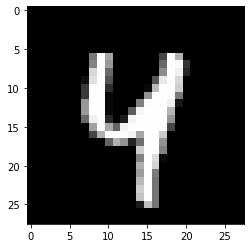

認識: 2 (99.96%) - 正しい：2


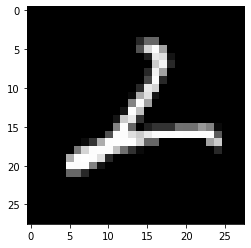

認識: 3 (92.73%) - 正しい：3


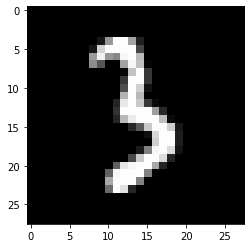

認識: 5 (99.82%) - 正しい：5


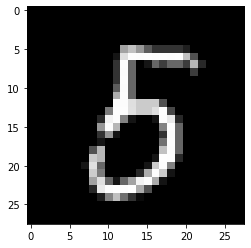

認識: 1 (99.92%) - 正しい：1


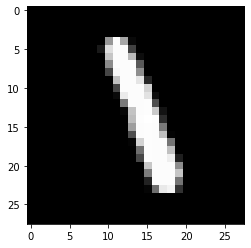

認識: 2 (99.99%) - 正しい：2


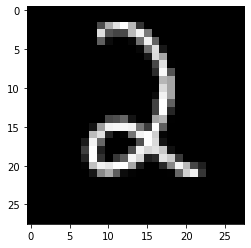

認識: 4 (99.83%) - 正しい：4


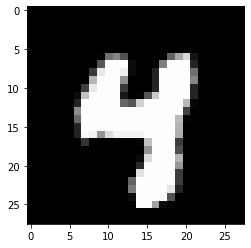

認識: 4 (99.82%) - 正しい：4


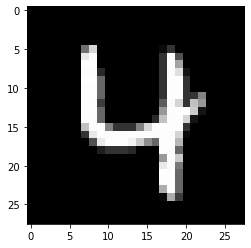

認識: 6 (99.87%) - 正しい：6


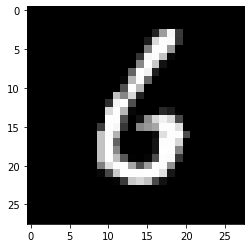

認識: 3 (100.00%) - 正しい：3


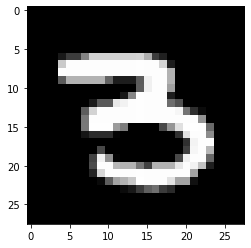

認識: 5 (100.00%) - 正しい：5


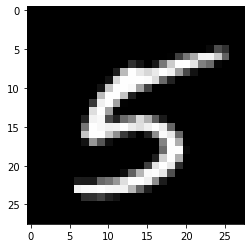

認識: 5 (99.13%) - 正しい：5


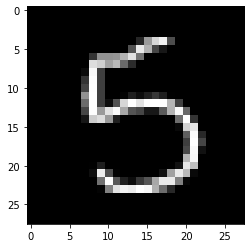

認識: 6 (100.00%) - 正しい：6


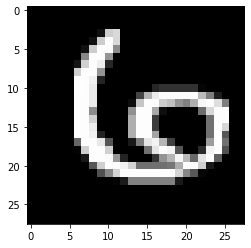

認識: 0 (98.88%) - 正しい：0


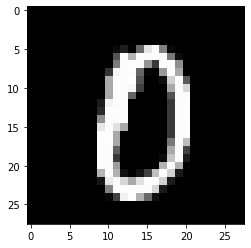

認識: 4 (100.00%) - 正しい：4


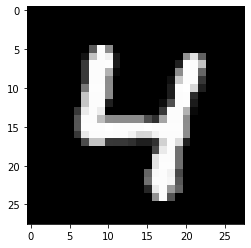

認識: 1 (99.85%) - 正しい：1


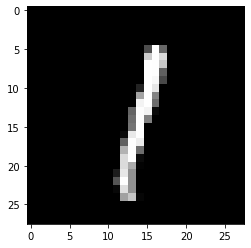

認識: 9 (99.91%) - 正しい：9


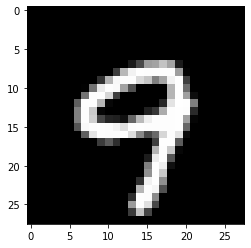

認識: 5 (99.92%) - 正しい：5


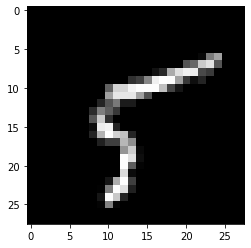

認識: 7 (100.00%) - 正しい：7


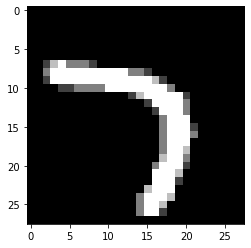

認識: 8 (99.99%) - 正しい：8


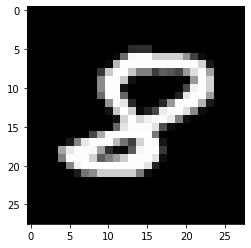

認識: 9 (96.71%) - 正しい：9


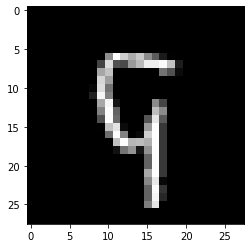

認識: 3 (52.74%) - 正しい：3


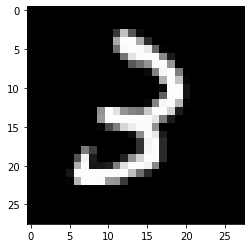

認識: 7 (96.54%) - 正しい：7


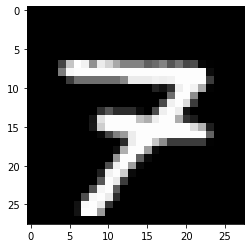

認識: 4 (98.77%) - 正しい：4


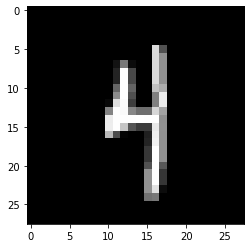

認識: 6 (38.92%) - 正しい：6


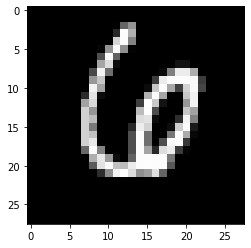

認識: 4 (98.42%) - 正しい：4


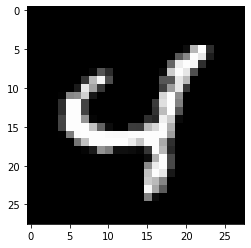

認識: 3 (99.97%) - 正しい：3


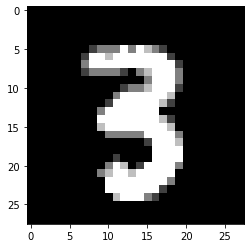

認識: 0 (99.99%) - 正しい：0


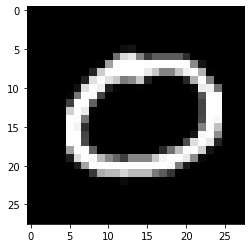

認識: 7 (99.97%) - 正しい：7


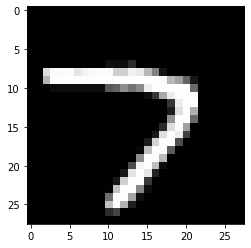

認識: 0 (100.00%) - 正しい：0


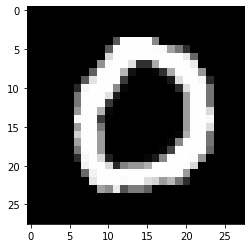

認識: 2 (65.09%) - 正しい：2


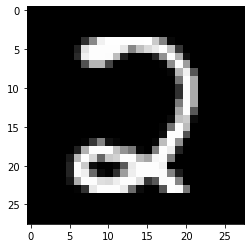

認識: 9 (99.88%) - 正しい：9


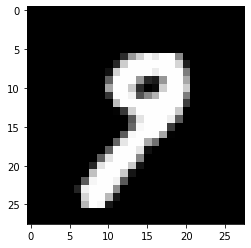

認識: 1 (99.82%) - 正しい：1


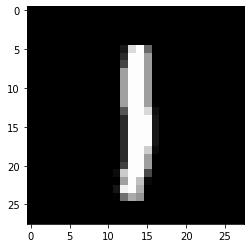

認識: 7 (99.96%) - 正しい：7


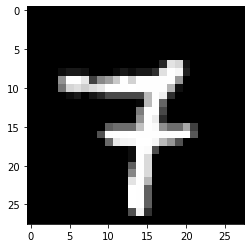

認識: 3 (99.11%) - 正しい：3


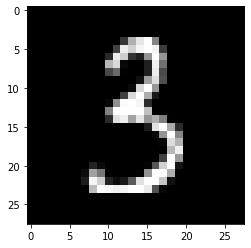

認識: 2 (99.95%) - 正しい：2


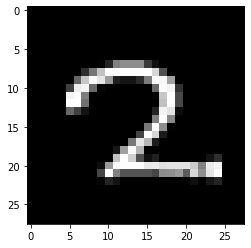

認識: 9 (99.71%) - 正しい：9


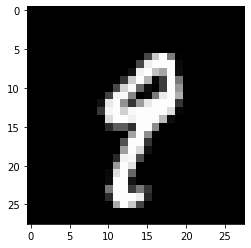

認識: 7 (100.00%) - 正しい：7


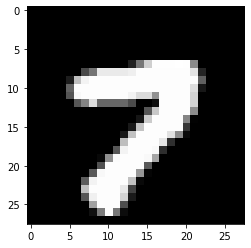

認識: 7 (99.68%) - 正しい：7


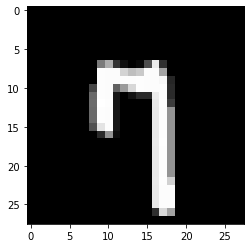

認識: 6 (98.60%) - 正しい：6


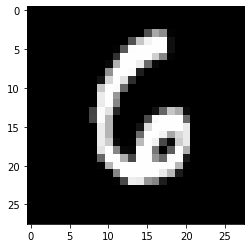

認識: 2 (100.00%) - 正しい：2


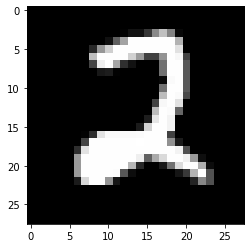

認識: 7 (99.96%) - 正しい：7


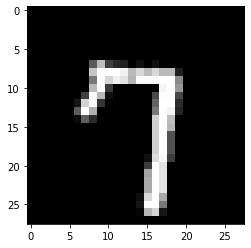

認識: 8 (99.65%) - 正しい：8


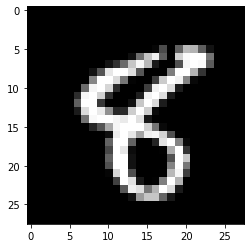

認識: 4 (99.99%) - 正しい：4


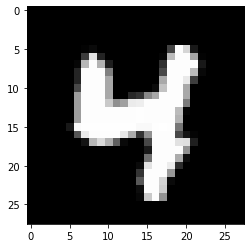

認識: 7 (100.00%) - 正しい：7


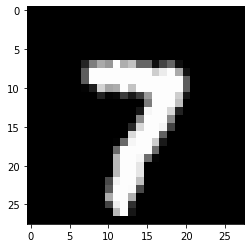

認識: 3 (84.54%) - 正しい：3


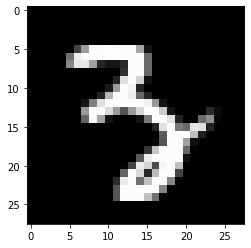

認識: 6 (100.00%) - 正しい：6


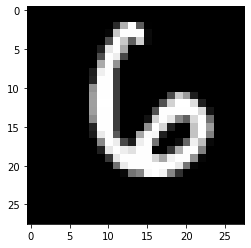

認識: 1 (99.99%) - 正しい：1


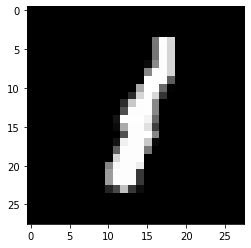

認識: 3 (99.87%) - 正しい：3


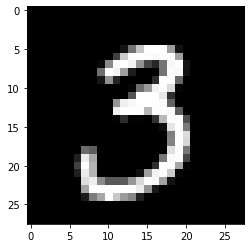

認識: 6 (100.00%) - 正しい：6


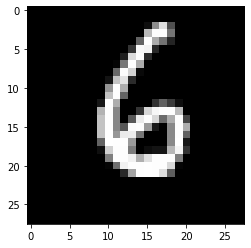

認識: 9 (90.73%) - 正しい：9


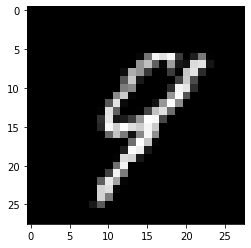

認識: 3 (99.95%) - 正しい：3


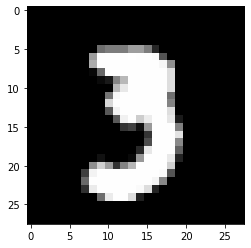

認識: 1 (98.54%) - 正しい：1


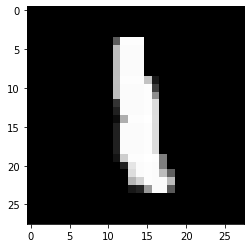

認識: 4 (99.50%) - 正しい：4


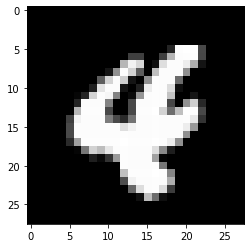

認識: 1 (89.34%) - 正しい：1


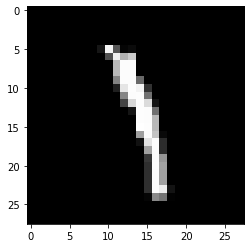

認識: 7 (85.35%) - 正しい：7


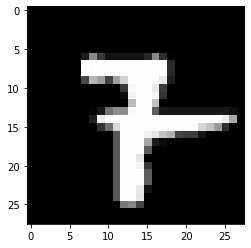

認識: 6 (99.78%) - 正しい：6


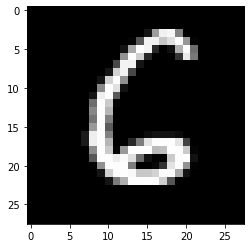

認識: 9 (100.00%) - 正しい：9


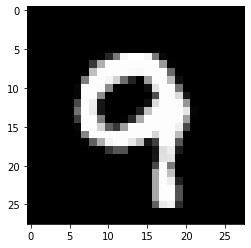

In [12]:
y_pred = model.predict(x_test_p)

for i in range(100):
    display_result(x_test[i], y_test[i], y_pred[i])

In [13]:
print(y_pred[8])

[0.00000942 0.         0.00030347 0.00000301 0.0000218  0.00126872
 0.9983663  0.00000013 0.00002217 0.00000496]


## テストデータで評価

全ての数字を確認するの大変なので、kerasの機能で、全てのテストデータを確認できる

In [14]:
model.evaluate(x_test_p, y_test_p)

313/313 [==============================] - 0s 694us/step - loss: 0.1638 - accuracy: 0.9539


[0.16375134885311127, 0.9538999795913696]